In [3]:
!git clone https://github.com/OfTheByteQuest/Data-Analytics-Learning-and-Projects.git

%cd Data-Analytics-Learning-and-Projects

Cloning into 'Data-Analytics-Learning-and-Projects'...
remote: Enumerating objects: 201, done.
remote: Counting objects: 100% (201/201), done.
remote: Compressing objects: 100% (151/151), done.
remote: Total 201 (delta 59), reused 162 (delta 37), pack-reused 0 (from 0)
Receiving objects: 100% (201/201), 5.08 MiB | 2.43 MiB/s, done.
Resolving deltas: 100% (59/59), done.
/content/Data-Analytics-Learning-and-Projects


In [3]:
# Configuration for git commands

import os
from google.colab import userdata

os.environ['EMAIL'] = userdata.get('EMAIL')
os.environ['USERNAME'] = userdata.get('GITHUB_USERNAME')
os.environ['TOKEN'] = userdata.get('GITHUB_TOKEN')

!git config --global user.email os.envrion['EMAIL']
!git config --global user.name os.environ['USERNAME']

In [11]:
# Importing mandatory lib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Setting ouput format for plots

from matplotlib_inline.backend_inline import set_matplotlib_formats, select_figure_formats
from IPython import get_ipython

set_matplotlib_formats('retina')
select_figure_formats(shell=get_ipython(), formats="svg")

## Plotting with Seaborn and Customization Techniques

### Utilizing Seaborn for advanced plotting

In [4]:
import seaborn as sns

In [5]:
fb = pd.read_csv(
    filepath_or_buffer = "/content/Data-Analytics-Learning-and-Projects/Chapter-6/Data/fb_stock_prices_2018.csv",
    index_col = "date",
    parse_dates = True
)

quakes = pd.read_csv(
    filepath_or_buffer = "/content/Data-Analytics-Learning-and-Projects/Chapter-6/Data/earthquakes.csv",
)

#### Categorical Data

In [ ]:
quakes.head()

mag magType           time                  place  tsunami parsed_place
0  1.35      ml  1539475168010  9km NE of Aguanga, CA        0   California
1  1.29      ml  1539475129610  9km NE of Aguanga, CA        0   California
2  3.42      ml  1539475062610  8km NE of Aguanga, CA        0   California
3  0.44      ml  1539474978070  9km NE of Aguanga, CA        0   California
4  2.16      md  1539474716050  10km NW of Avenal, CA        0   California

In [ ]:
fb.head()

open    high       low   close    volume
date                                                  
2018-01-02  177.68  181.58  177.5500  181.42  18151903
2018-01-03  181.88  184.78  181.3300  184.67  16886563
2018-01-04  184.90  186.21  184.0996  184.33  13880896
2018-01-05  185.59  186.90  184.9300  186.85  13574535
2018-01-08  187.20  188.90  186.3300  188.28  17994726

<Axes: xlabel='magType', ylabel='mag'>

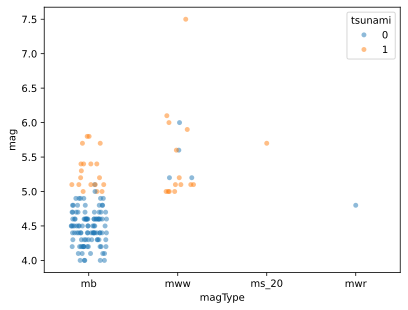

In [ ]:
sns.stripplot(
    x='magType',
    y='mag',
    hue = 'tsunami',
    data = quakes.query('parsed_place == "Indonesia"'),
    jitter=0.2,
    alpha=0.5
)

<Axes: xlabel='magType', ylabel='mag'>

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


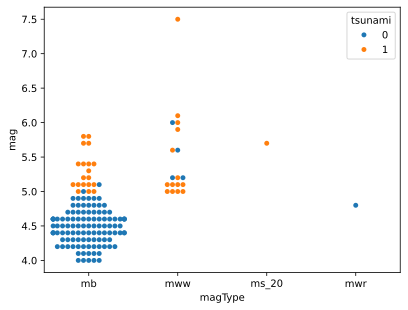

In [ ]:
sns.swarmplot(
    x='magType',
    y = 'mag',
    data = quakes.query('parsed_place == "Indonesia"'),
    hue='tsunami',
    # dodge=True
)

#### Correlations and heatmaps

<Axes: >

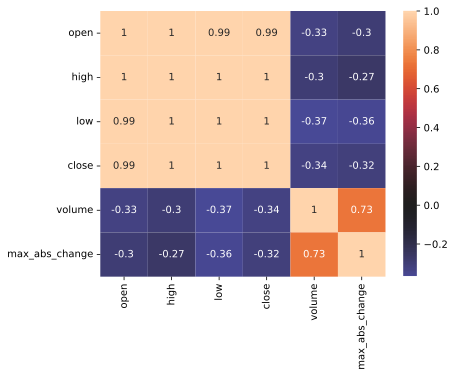

In [ ]:
sns.heatmap(
    data = fb.sort_index().assign(
        volume = np.log(fb.volume),
        max_abs_change = fb.high - fb.low
    ).corr(),
    annot = True,
    center = 0
)

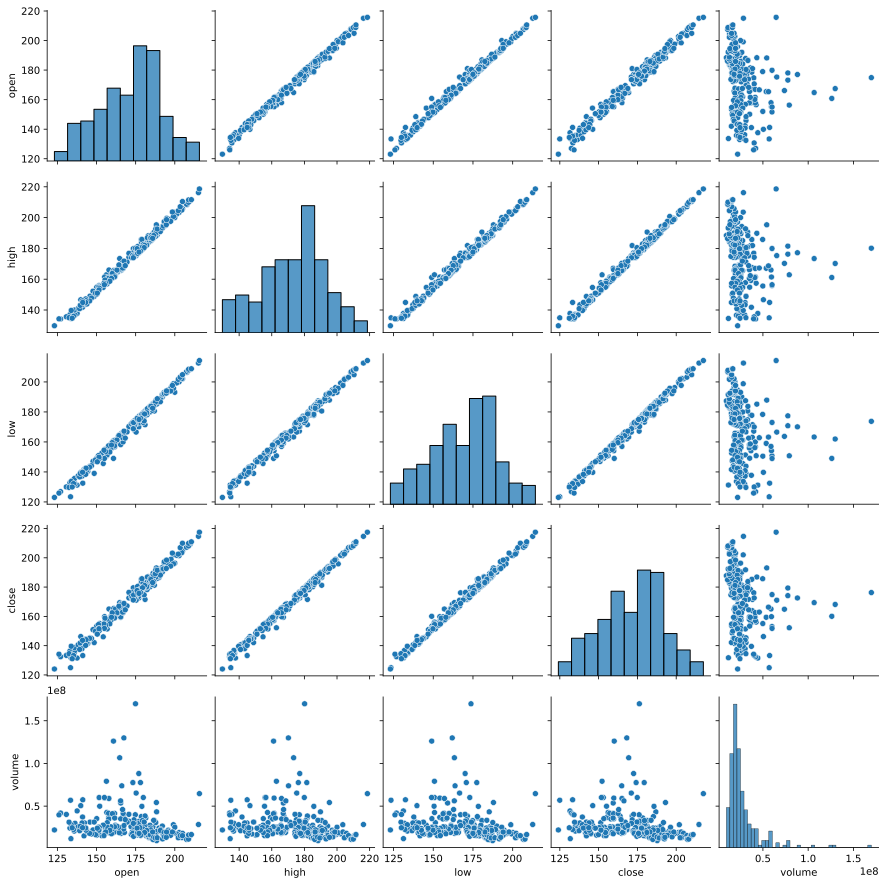

In [ ]:
sns.pairplot(fb)

In [ ]:
# sns.pairplot
# sns.husl_palette

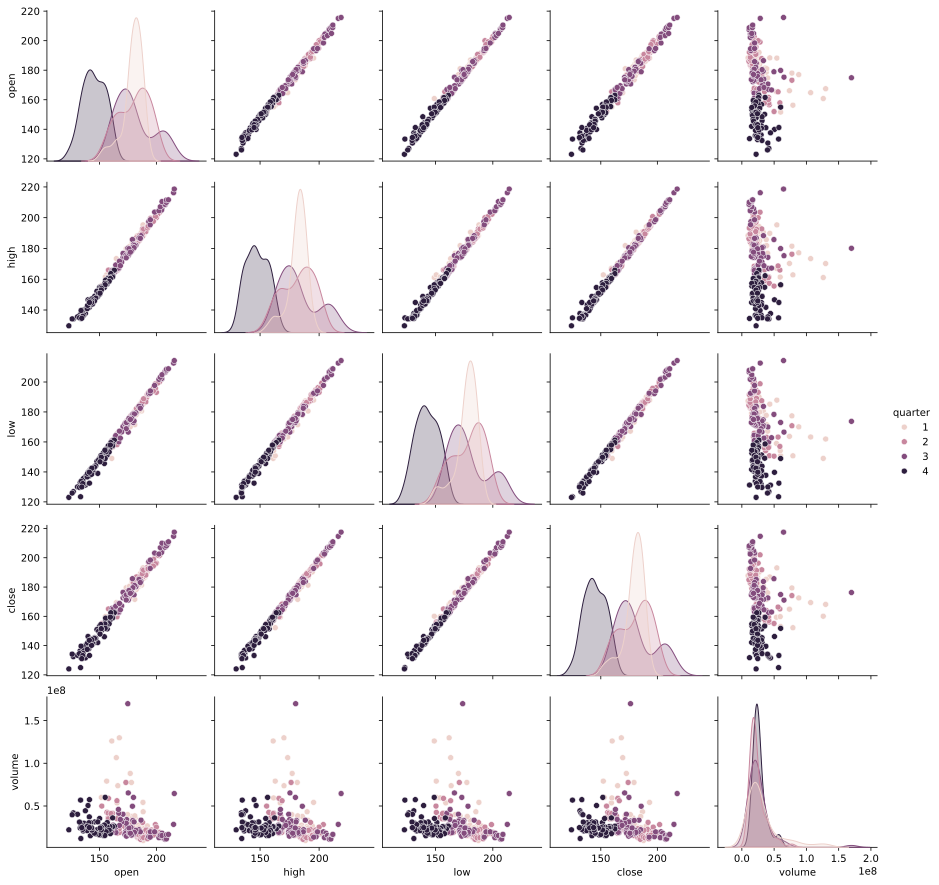

In [ ]:
sns.pairplot(
    data=fb.assign(quarter = lambda x: x.index.quarter),
    diag_kind='kde',
    hue='quarter'
)

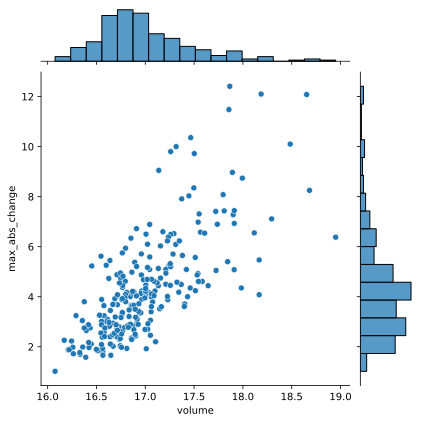

In [ ]:
sns.jointplot(
    x='volume',
    y='max_abs_change',
    data = fb.assign(
        volume = np.log(fb.volume),
        max_abs_change = fb.high - fb.low
    )
)

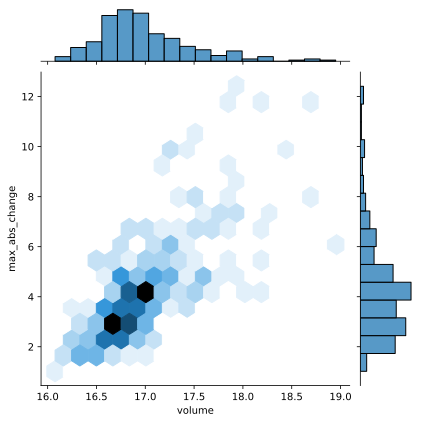

In [ ]:
sns.jointplot(
    x='volume',
    y='max_abs_change',
    kind='hex',
    data = fb.assign(
        volume = np.log(fb.volume),
        max_abs_change = fb.high - fb.low
    )
)

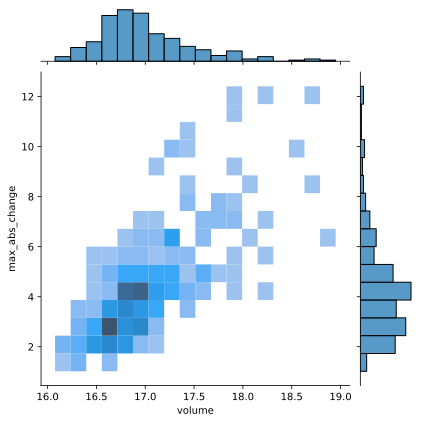

In [ ]:
sns.jointplot(
    x='volume',
    y='max_abs_change',
    kind='hist',
    data = fb.assign(
        volume = np.log(fb.volume),
        max_abs_change = fb.high - fb.low
    )
)

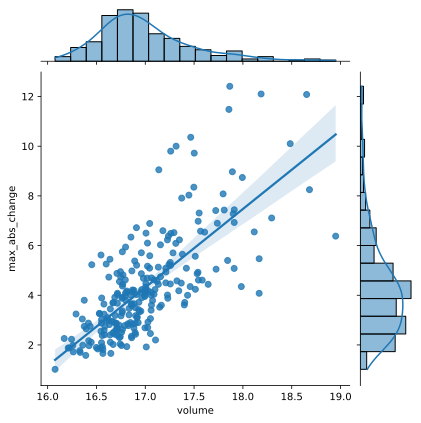

In [ ]:
sns.jointplot(
    x='volume',
    y='max_abs_change',
    kind='reg',
    data = fb.assign(
        volume = np.log(fb.volume),
        max_abs_change = fb.high - fb.low
    )
)

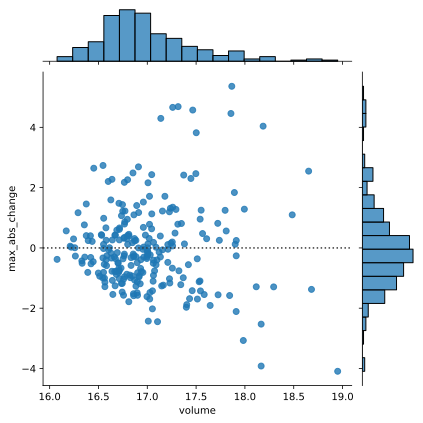

In [ ]:
sns.jointplot(
    x='volume',
    y='max_abs_change',
    kind='resid',
    data = fb.assign(
        volume = np.log(fb.volume),
        max_abs_change = fb.high - fb.low
    )
)

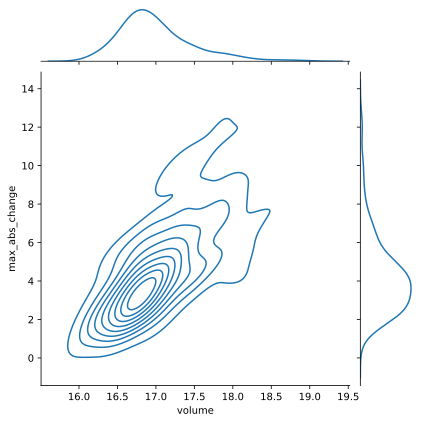

In [ ]:
sns.jointplot(
    x='volume',
    y='max_abs_change',
    kind='kde',
    data = fb.assign(
        volume = np.log(fb.volume),
        max_abs_change = fb.high - fb.low
    )
)

#### Regression Plots

In [ ]:
fb_reg_data = fb.assign(
    volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
).iloc[:,-2:]

In [ ]:
import itertools

###### Info on Iterators and Iterables

Iterables are objects that can be iterated over. When we start a loop, an iterator is created from the iterable. At each iteration, the iterator provides its next value, until it is exhausted; this means that once we complete a single iteration through all its items, there is nothing left, and it can't be reused. Iterators are iterables, but not all iterables are iterators. Iterables that aren't iterators can be used repeatedly. The iterators we get back when using itertools can only be used once through

In [ ]:
iterator = itertools.repeat("I am an iterator", 1)

for i in iterator:
  print(f'-->{i}')

print('This printed once because the iterator is exhausted')

for i in iterator:
  print(f'-->{i}')

-->I am an iterator
This printed once because the iterator is exhausted


In [ ]:
iterable = list(itertools.repeat("I am an iterable", 1))

for i in iterable:
  print(f'-->{i}')

print('This prints again because it\'s an iterbale:')

for i in iterable:
  print(f'-->{i}')

-->I am an iterable
This prints again because it's an iterbale:
-->I am an iterable


In [ ]:
def reg_resid_plots(data):
  """
  Using seaborn, plot the regression and residuals plots
  side-by-side for every permutation of 2 columns in the data.

  Parameters:
        - data: A pandas DataFrame

  Returns:
        - A matplotlib Figure object.
  """

  num_cols = data.shape[1]
  permutation_count = num_cols * (num_cols - 1)

  fig, ax = plt.subplots(permutation_count, 2, figsize=(15, 8))

  for (x, y), axes, color in zip(
      itertools.permutations(data.columns, 2),
      ax,
      itertools.cycle(['royalblue','darkorange'])
  ):
      for subplot, func in zip(axes, (sns.regplot, sns.residplot)):
        func(x=x, y=y, data=data, ax=subplot, color=color)
  plt.close()
  return fig

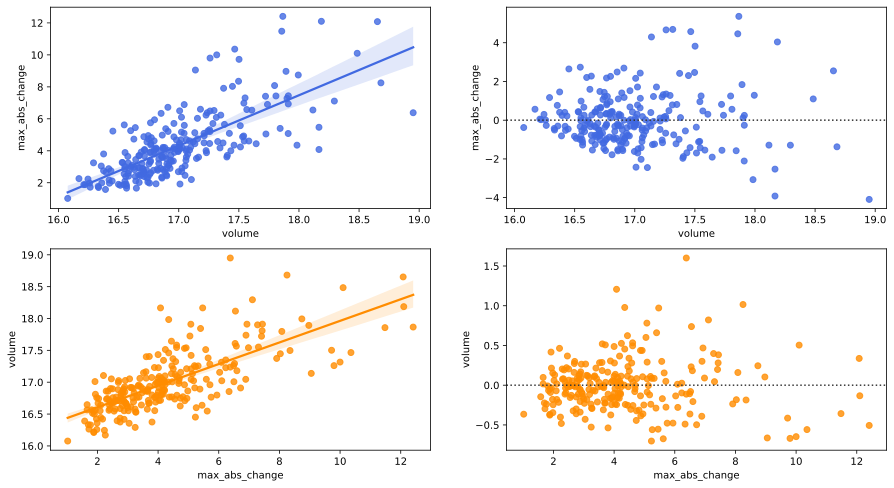

In [ ]:
reg_resid_plots(fb_reg_data)

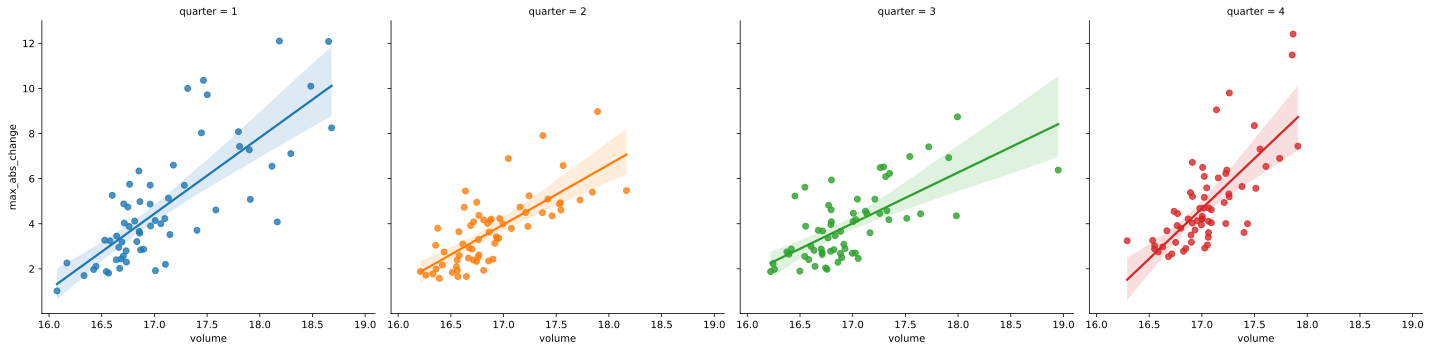

In [ ]:
sns.lmplot(
    x='volume',
    y='max_abs_change',
    data=fb.assign(
        volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low,
        quarter=lambda x: x.index.quarter
    ),
    col='quarter',
    hue='quarter'
)

#### Distributions

Text(0.5, 0.98, 'Comparing earthquake magnitude by magType')

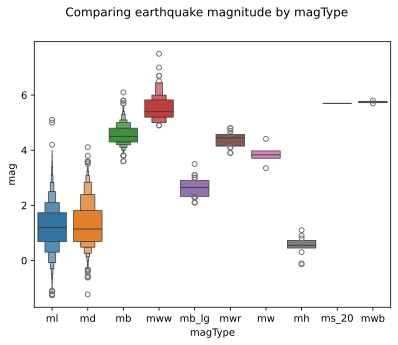

In [ ]:
sns.boxenplot(
    x='magType',
    y='mag',
    data=quakes[['magType', 'mag']],
    hue='magType',
    legend=False
)
plt.suptitle('Comparing earthquake magnitude by magType')

Text(0.5, 0.98, 'Comparing earthquake magnitude by magType')

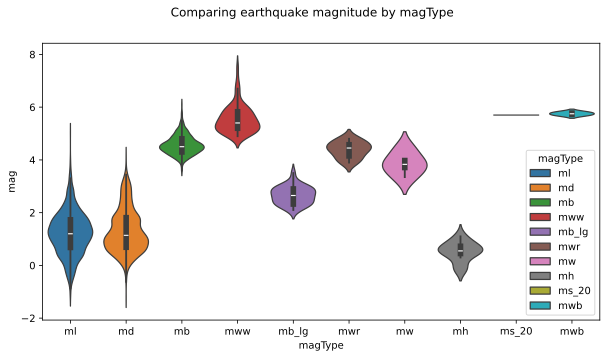

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.violinplot(
    x='magType',
    y='mag',
    data=quakes[['magType', 'mag']],
    ax=ax,
    density_norm='width', # scale='width' has been removed
    hue='magType',
    # split=True,
    # inner='quartile'
)

plt.suptitle('Comparing earthquake magnitude by magType')


#### Faceting

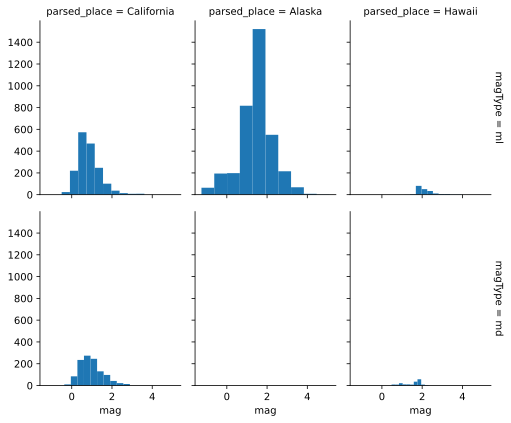

In [ ]:
g = sns.FacetGrid(
    quakes[
        (quakes.parsed_place.isin([
            'California',
            'Alaska',
            'Hawaii',
        ]))\
        & (quakes.magType.isin([
            'ml',
            'md'
        ]))
    ],
    row='magType',
    col='parsed_place',
    margin_titles=True,
    height=3,
    aspect=0.8,
)

g = g.map(plt.hist, 'mag')

### Formatting

In [ ]:
fb = pd.read_csv(
    filepath_or_buffer="/content/Data-Analytics-Learning-and-Projects/Chapter-6/Data/fb_stock_prices_2018.csv",
    index_col="date",
    parse_dates=True
)

#### Title and Labels

Text(0, 0.5, 'Price ($)')

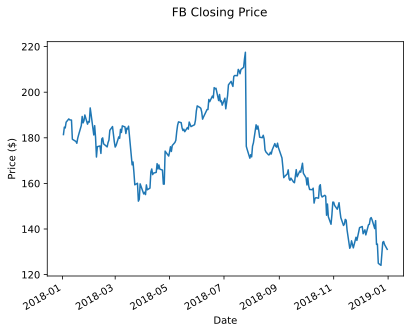

In [ ]:
fb.close.plot()
plt.suptitle('FB Closing Price')
plt.xlabel('Date')
plt.ylabel('Price ($)')

Text(0, 0.5, 'Price ($)')

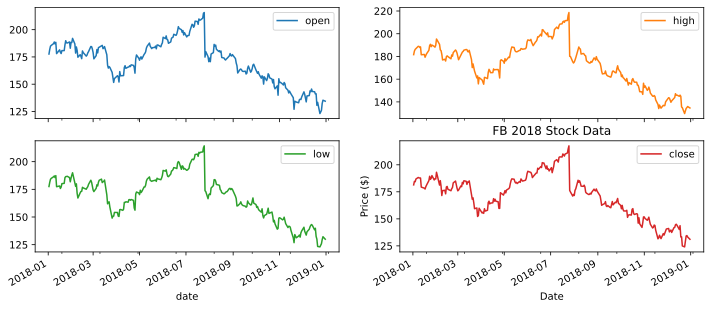

In [ ]:
fb.iloc[:,:4].plot(subplots=True, layout=(2,2), figsize=(12,5))
plt.title('FB 2018 Stock Data')
plt.xlabel('Date')
plt.ylabel('Price ($)')

Text(0, 0.5, 'Price ($)')

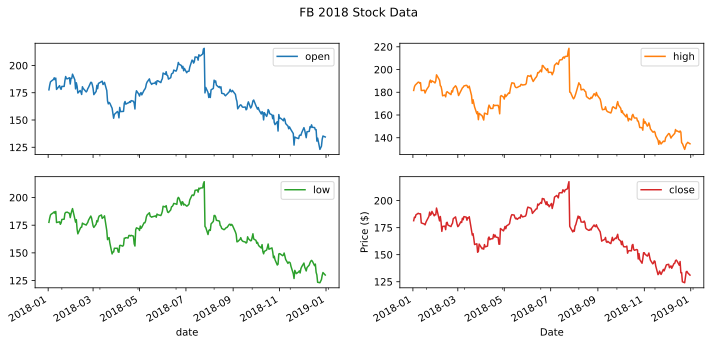

In [ ]:
fb.iloc[:,:4].plot(subplots=True, layout=(2,2), figsize=(12,5))
plt.suptitle('FB 2018 Stock Data')
plt.xlabel('Date')
plt.ylabel('Price ($)')

#### Legends

Text(0, 0.5, 'Price ($)')

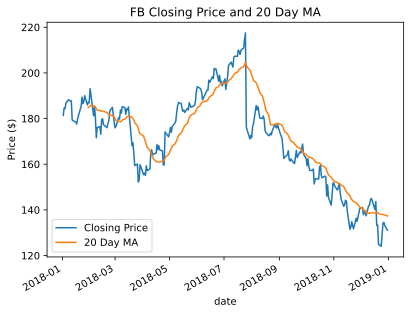

In [ ]:
fb.assign(
    ma=lambda x: x.close.rolling(20).mean()
).plot(
    y=['close', 'ma'],
    title = 'FB Closing Price and 20 Day MA',
    label=['Closing Price', '20 Day MA']
)
plt.legend(loc='lower left') # Same plt.legend(loc=3)
plt.ylabel('Price ($)')

#### Formatting axes

Text(0, 0.5, 'Price ($)')

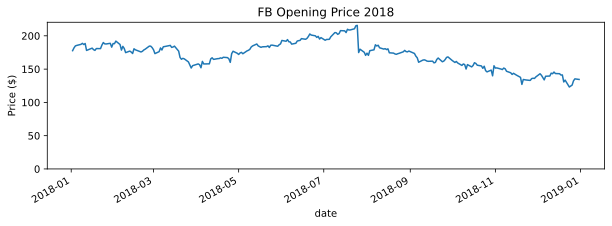

In [ ]:
fb.open.plot(
    figsize=(10,3),
    title='FB Opening Price 2018'
)
plt.ylim(0, None) # Same as plt.(0, ['Keep the automatically generated value'])
plt.ylabel('Price ($)')

Text(0, 0.5, 'Price ($)')

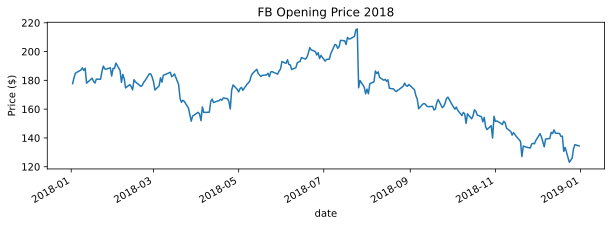

In [ ]:
fb.open.plot(
    figsize=(10,3),
    title='FB Opening Price 2018'
)
plt.ylim(None, None) # Same as not using plt.ylim()
plt.ylabel('Price ($)')

In [ ]:
import matplotlib.ticker as ticker

Text(0, 0.5, 'Percent of highest price ($218.62)')

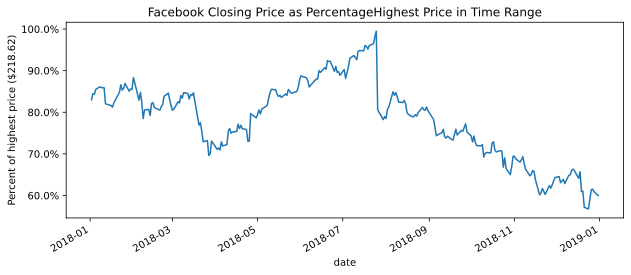

In [ ]:
ax = fb.close.plot(
    figsize=(10,4),
    title='Facebook Closing Price as Percentage'\
          'Highest Price in Time Range'
)
ax.yaxis.set_major_formatter(
    ticker.PercentFormatter(xmax=fb.high.max())
)
ax.set_yticks(
    [fb.high.max() *pct for pct in np.linspace(0.6, 1, num=5)]
)
ax.set_ylabel(f'Percent of highest price (${fb.high.max()})')

***Note:***Note that we have the option of accessing the axis to format through
an attribute on the Axes object (`xaxis`/`yaxis`) or using a method
call (`get_xaxis()`/`get_yaxis()`).

The `set_major_locator()` is used in this code block as we deciding on which tick points to show and which to not rather than formatting them. The `base` parameter takes the value of which multiples are shown on the axis.

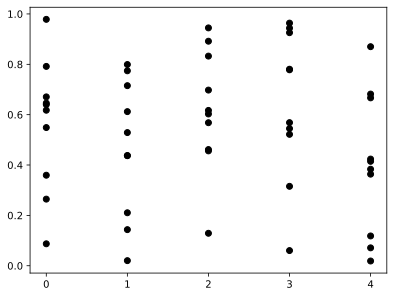

In [ ]:
# Below code blocl produced the same result as this one but, instead of
# get_xaxis() method uses xaxis property

fig, ax = plt.subplots(1, 1)
np.random.seed(0) # make repeatable
ax.plot(np.tile(np.arange(0, 5), 10), np.random.rand(50), 'ko')
ax.get_xaxis().set_major_locator(ticker.MultipleLocator(base=1))

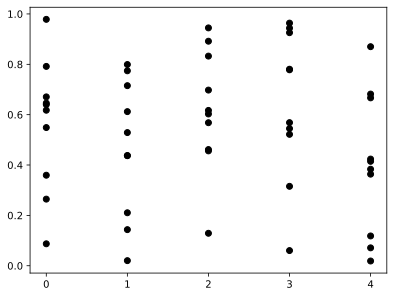

In [ ]:
fig, ax = plt.subplots(1, 1)
np.random.seed(0) # make repeatable
ax.plot(np.tile(np.arange(0, 5), 10), np.random.rand(50), 'ko')
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))

### Customizing Visualizations

In [6]:
fb = pd.read_csv(
    filepath_or_buffer="/content/Data-Analytics-Learning-and-Projects/Chapter-6/Data/fb_stock_prices_2018.csv",
    index_col="date",
    parse_dates=True
)

quakes = pd.read_csv(
    filepath_or_buffer="/content/Data-Analytics-Learning-and-Projects/Chapter-6/Data/earthquakes.csv",
)

#### Adding reference lines

In [9]:
!git clone https://github.com/stefmolin/stock-analysis.git

Cloning into 'stock-analysis'...
remote: Enumerating objects: 549, done.
remote: Counting objects: 100% (185/185), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 549 (delta 161), reused 167 (delta 152), pack-reused 364 (from 1)
Receiving objects: 100% (549/549), 743.35 KiB | 5.67 MiB/s, done.
Resolving deltas: 100% (361/361), done.


In [10]:
%cd stock-analysis

/content/Data-Analytics-Learning-and-Projects/stock-analysis


In [11]:
! pip3 install -e .

Obtaining file:///content/Data-Analytics-Learning-and-Projects/stock-analysis
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.3 MB/s eta 0:00:00
  Running setup.py develop for stock_analysis


In [12]:
from stock_analysis import StockAnalyzer

In [13]:
fb_analyzer = StockAnalyzer(fb)
support, resistance = (
    getattr(fb_analyzer, stat) (level=3) for stat in ['support', 'resistance']
)
support, resistance

/content/Data-Analytics-Learning-and-Projects/stock-analysis/stock_analysis/stock_analyzer.py:49: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  return self.data.last('1D').low.iat[0]
/content/Data-Analytics-Learning-and-Projects/stock-analysis/stock_analysis/stock_analyzer.py:44: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  return self.data.last('1D').high.iat[0]
/content/Data-Analytics-Learning-and-Projects/stock-analysis/stock_analysis/stock_analyzer.py:39: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  return self.data.last('1D').close.iat[0]


(np.float64(124.4566666666667), np.float64(138.5266666666667))

In [ ]:
# getattr?

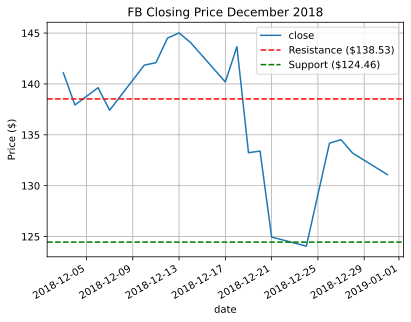

In [14]:
fb.close.loc['2018-12'].plot(
    title='FB Closing Price December 2018'
)
plt.axhline(
    y=resistance,
    color='r',
    linestyle='--',
    # fmt='r--', is not supported in axhline
    label=f'Resistance (${resistance:,.2f})'
)
plt.axhline(
    y=support,
    color='g',
    linestyle='--',
    # fmt='r--', is not supported in axhline
    label=f'Support (${support:,.2f})'
)
plt.ylabel('Price ($)')
plt.legend()
plt.grid()

In [15]:
import itertools

def std_from_mean_kde(data):
  """
  Plot the KDE of the pandas series along with vertical
  reference lines for each standard deviation from the mean.
  Parameters:
    - data: pandas Series with numeric data
  Returns: Matplotlib Axes object.
  """
  mean_mag, std_mean = data.mean(), data.std()
  ax = data.plot(kind='kde')
  ax.axvline(mean_mag, color='b', alpha=0.2, label='mean')
  colors = ['green', 'orange', 'red']
  multipliers = [1, 2, 3]
  signs = ['-', '+']

  for sign, (color, multiplier) in itertools.product(
    signs, zip(colors, multipliers)
    ):
      adjustment = multiplier * std_mean
      if sign == '-':
        value = mean_mag - adjustment
        label = '{} {}{}{}'.format(
            r'$\mu$', r'$\pm$', multiplier, r'$\sigma$'
        )
      else:
        value = mean_mag + adjustment
        label = None # label each color only once
      ax.axvline(value, color=color, label=label, alpha=0.5)
  ax.legend()
  return ax

Text(0.5, 0, 'mb earthquake magnitude')

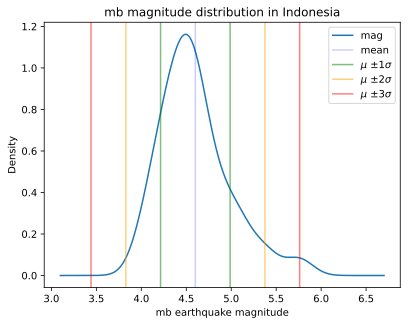

In [16]:
ax = std_from_mean_kde(
    quakes.query(
        'magType == "mb" and parsed_place == "Indonesia"'
    ).mag
)
ax.set_title('mb magnitude distribution in Indonesia')
ax.set_xlabel('mb earthquake magnitude')

Text(0, 0.5, 'y')

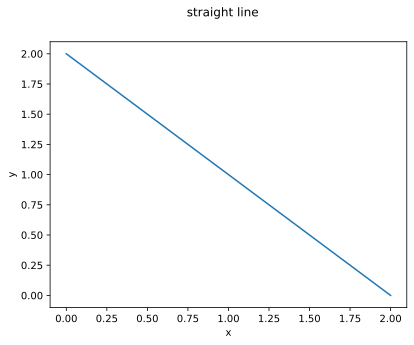

In [17]:
plt.plot([0, 2], [2, 0]) # or ax.plot() with Axes object in ax
plt.suptitle('straight line')
plt.xlabel('x')
plt.ylabel('y')

#### Shading Regions

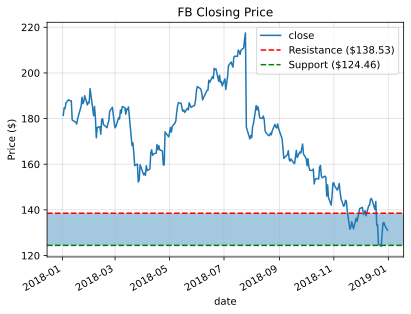

In [18]:
ax = fb.close.plot(title="FB Closing Price")
ax.axhspan(ymin=support,
           ymax=resistance,
           alpha=0.4)
ax.axhline(
    y=resistance,
    color='r',
    linestyle='--',
    # fmt='r--', is not supported in axhline
    label=f'Resistance (${resistance:,.2f})'
)
ax.axhline(
    y=support,
    color='g',
    linestyle='--',
    # fmt='r--', is not supported in axhline
    label=f'Support (${support:,.2f})'
)
ax.set_ylabel('Price ($)')
ax.legend()
ax.grid(alpha=0.4)

Text(0.5, 0.98, 'FB differential between high and low price Q4 2018')

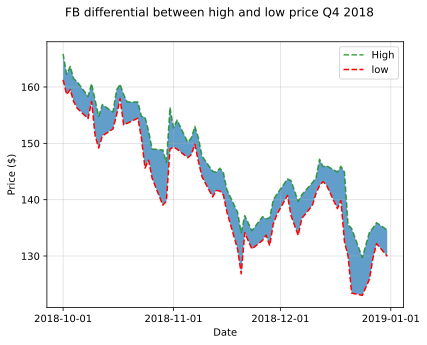

In [19]:
fb_q4 = fb.loc['2018-Q4']
plt.plot(fb_q4.index, fb_q4.high, label='High', color='green',linestyle="--", alpha=0.7)
plt.plot(fb_q4.index, fb_q4.low, label='low', color="red", linestyle="--")
plt.fill_between(
    x = fb_q4.index,
    y1 = fb_q4.high,
    y2 = fb_q4.low,
    alpha = 0.7,
)
ticks = ['2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01']
plt.xticks(ticks, ticks)
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(alpha=0.4)
plt.suptitle("FB differential between high and low price Q4 2018")

Text(0.5, 0.98, 'FB differential between high and low price Q4 2018')

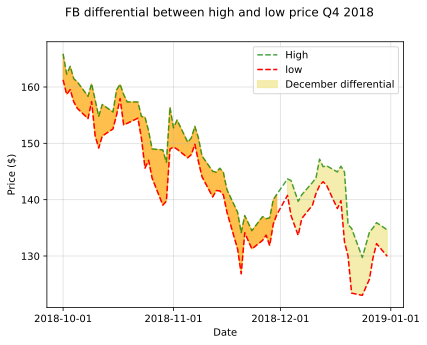

In [20]:
fb_q4 = fb.loc['2018-Q4']
plt.plot(fb_q4.index, fb_q4.high, label='High', color='green',linestyle="--", alpha=0.7)
plt.plot(fb_q4.index, fb_q4.low, label='low', color="red", linestyle="--")
plt.fill_between(
    x = fb_q4.index,
    y1 = fb_q4.high,
    y2 = fb_q4.low,
    where = fb_q4.index.month == 12,
    color='khaki',
    alpha = 0.7,
    label='December differential'
)
plt.fill_between(
    x = fb_q4.index,
    y1 = fb_q4.high,
    y2 = fb_q4.low,
    where = fb_q4.index.month.isin([10, 11]),
    color='orange',
    alpha = 0.7,
)
ticks = ['2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01']
plt.xticks(ticks, ticks)
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(alpha=0.4)
plt.suptitle("FB differential between high and low price Q4 2018")

#### Annotations

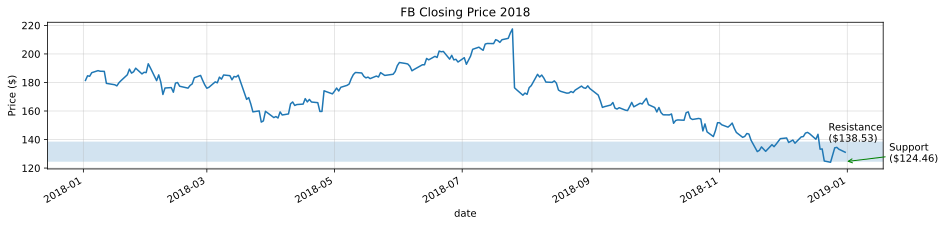

In [21]:
ax = fb.close.plot(title='FB Closing Price 2018', figsize=(15, 3))
ax.axhspan(support, resistance, alpha=0.2)
ax.annotate(
    text=f'Support\n(${support:,.2f})',
    xy=('2018-12-31', support),
    xytext=('2019-01-21', support),
    arrowprops={'arrowstyle': '->', 'color':'green'}
)
ax.annotate(
    text=f'Resistance\n(${resistance:,.2f})',
    xy=('2018-12-23', resistance),
)
ax.set_ylabel('Price ($)')
ax.grid(alpha=0.4)

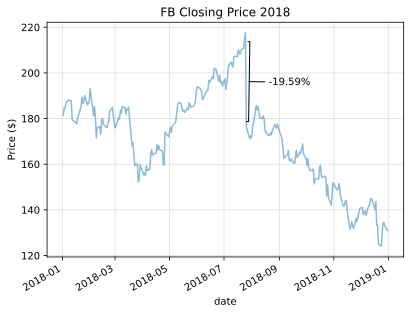

In [ ]:
close_price = fb.loc['2018-07-25', 'close']
open_price = fb.loc['2018-07-26', 'open']
pct_drop = (open_price - close_price)/close_price
fb.close.plot(title='FB Closing Price 2018', alpha=0.5)
plt.annotate(
    text=f'{pct_drop:.2%}',
    xy=('2018-07-27', (open_price + close_price)/2),
    xytext=('2018-08-20', (open_price + close_price)/2 - 1.5),
    arrowprops=dict(arrowstyle='-[, widthB=4.0, lengthB=0.2')
)
plt.ylabel('Price ($)')
plt.grid(alpha=0.4)

#### Colors

In [7]:
from matplotlib import cm

In [8]:
cm.datad.keys()

dict_keys(['Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c'])

<ipython-input-9-eaeae842496f>:12: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  ax.plot(fb.close, 'purple', alpha=0.25, label='closing price')


Text(0, 0.5, 'price ($)')

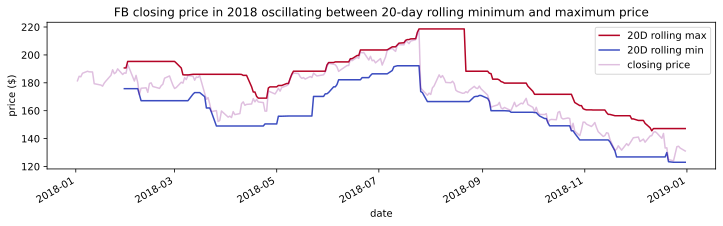

In [9]:
ax = fb.assign(
    rolling_min=lambda x: x.low.rolling(20).min(),
    rolling_max=lambda x: x.high.rolling(20).max(),
).plot(
    y=['rolling_max', 'rolling_min'],
    colormap=cm.coolwarm_r,
    label=['20D rolling max', '20D rolling min'],
    figsize=(12, 3),
    title='FB closing price in 2018 oscillating between '\
          '20-day rolling minimum and maximum price'
)
ax.plot(fb.close, 'purple', alpha=0.25, label='closing price')
plt.legend()
plt.ylabel('price ($)')

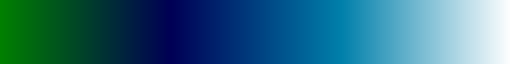

In [10]:
# cm.get_cmap('ocean')(0.5) is Deprecated

from matplotlib import colormaps

colormaps['ocean']

In [11]:
colormaps['ocean'](0.5)

(np.float64(0.0),
 np.float64(0.2529411764705882),
 np.float64(0.5019607843137255),
 np.float64(1.0))

Text(0, 0.5, 'Price ($)')

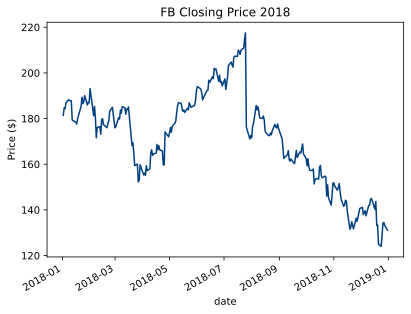

In [12]:
fb.close.plot(
    color=colormaps['ocean'](0.5),
    title='FB Closing Price 2018'
)
plt.ylabel('Price ($)')

In [13]:
import re

In [14]:
def hex_to_rgb_color_list(colors):
  """
  Take color or list of hex code colors and convert them
  to RGB colors in the range [0,1].
  Parameters:
  - colors: Color or list of color strings as hex codes
  Returns: The color or list of colors in RGB representation.
  """
  if isinstance(colors, str):
      colors = [colors]
  for i, color in enumerate(
      [color.replace('#', '') for color in colors]
  ):
      hex_length = len(color)
      if hex_length not in [3, 6]:
            raise ValueError(
                    'Your colors must be of the form #FFFFFF or #FFF'
            )
      regex = '.' * (hex_length // 3)
      colors[i] = [
          int(val * (6 // hex_length), 16)/255 \
          for val in re.findall(regex, color)
      ]
  return colors[0] if len(colors) == 1 else colors


from matplotlib.colors import ListedColormap

def two_color_sequential_cmap(rgb_color_list):
    """
    Created a sequential colormap blending from one color to
    the other.
    Parameters:
        - rgb_color_list: A list of colors represented as [R, G, B]
                          values in the range [0, 1], like
                          [[0, 0, 0], [1, 1, 1]], for black
                          and white, respectively.
    Returns:
          A matplotlib ListedColormap object with your colormap.
    """
    if not isinstance(rgb_color_list, list):
        raise ValueError('Colors must be passed as a list!')
    elif len(rgb_color_list) != 2:
        raise ValueError(
            'Can only specify two colors; '
            'one for each end of the spectrum.'
        )
    elif (
        not isinstance(rgb_color_list[0], list) \
        or not isinstance(rgb_color_list[1], list)
    ) or (
        len(rgb_color_list[0]) != 3 or len(rgb_color_list[1]) != 3
    ):
        raise ValueError(
            'Each color should be represented as a list of size 3.'
        )
    N = 256
    entries = 4 # red, green, blue, alpha
    rgbas = np.ones((N, entries))
    for i in range(entries - 1): # we don't alter alphas
        rgbas[:, i] = np.linspace(
            start=rgb_color_list[0][i],
            stop=rgb_color_list[1][i],
            num=N
        )
    return ListedColormap(rgbas)

In [15]:
import matplotlib.pyplot as plt

def draw_cmap(cmap):
    """
    Draw a colorbar for visualizing a colormap.
    Parameters:
        - cmap: A matplotlib colormap
    Returns:
        A matplotlib colorbar, which you can save with:
        `plt.savefig(<file_name>, bbox_inches='tight')`
    """
    img = plt.imshow(np.array([[0,1]]), cmap=cmap)
    cbar = plt.colorbar(orientation='horizontal', cmap=cmap)
    img.axes.remove()
    return cbar

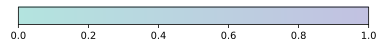

In [16]:
my_edge_colors = ['#B3E4DF', '#C2C1E1']
RGBS = hex_to_rgb_color_list(my_edge_colors)
my_cmap = two_color_sequential_cmap(RGBS)
draw_cmap(my_cmap)

In [17]:
# plt.imshow

In [18]:
def blended_cmap(rgb_color_list):
  """
  Create a colormap belnding from one color to the other.

  Parameters:
    - rgb_color_list: A list of colors to represented as [R, G, B]
                      values in the range [0, 1], like
                      [[0, 0, 0], [1, 1, 1], [1, 1, 1]], for black to white
                      and white, respectively.
  Returns: A matplotlib ListedColormap object with your colormap.
  """
  if not isinstance(rgb_color_list, list):
    # Type-Checking of rgb_color_list
    raise ValueError('Colors must be passed as a list!')
    # Size-checking of rgb_color_list
  elif len(rgb_color_list) < 2:
    raise ValueError('Must specify at least 2 colors.')

  # Type-Checking and size-checking of each color element in the list.
  for color in rgb_color_list:
    if (not isinstance(color, list)) or (len(color) != 3):
      raise ValueError('Each color must be a list of size 3.')

  N, entries = 256, 4
  rgbas  = np.ones((N, entries)) # rd, green, blue, alpha

  segment_count = len(rgb_color_list) - 1
  segment_size = N // segment_count
  remainder = N % segment_count

  for i in range(entries - 1): # we don't alter alphas
    updates = []
    for seg in range(1, segment_count + 1):
      # handle uneven splits due to remainder
      offset = 0 if not remainder or seg > 1 else remainder
      updates.append(np.linspace(
          start=rgb_color_list[seg-1][i],
          stop=rgb_color_list[seg][i],
          num=segment_size + offset
      ))
    rgbas[:,i] = np.concatenate(updates)
  return ListedColormap(rgbas)


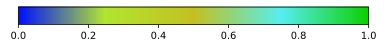

In [19]:
my_colors = [
    '#01F', '#B2E42F', '#C2C121', '#5EE', '0DD000'
]
rgbs = hex_to_rgb_color_list(my_colors)
my_cmap = blended_cmap(rgbs)
draw_cmap(my_cmap)

In [20]:
import itertools

In [21]:
colors = itertools.cycle(['#fff', '#f0f0f0', '#000'])
colors

In [22]:
from matplotlib.colors import ListedColormap

In [24]:
# ListedColormap

###### Understanding Leap Years and Calendar Corrections

***Leap Year Rules***
To determine if a year is a leap year:
1. If the year is divisible by 4, it's a leap year
2. If the year is divisible by 100, it's NOT a leap year
3. If the year is divisible by 400, it IS a leap year

Examples:
- 2020, 2024: Leap years (divisible by 4)
- 1900, 2100: Not leap years (divisible by 100 but not 400)
- 2000, 2400: Leap years (divisible by 400)

***Gregorian Calendar Corrections***
When implemented in 1582, the Gregorian calendar:
- Skipped 10 days (Oct 4 was followed by Oct 15) to realign with astronomical events
- Modified leap year rules to prevent future drift

***Mathematical Calculations***

**Basic Calendar Math**
The average year length in the Gregorian calendar:
- Base year: 365 days
- Add for leap years every 4 years: +1/4 day (0.25)
- Subtract for skipped leap years every 100 years: -1/100 day (0.01)
- Add back for kept leap years every 400 years: +1/400 day (0.0025)

Calculation: 365 + 0.25 - 0.01 + 0.0025 = 365.2425 days

**Actual vs. Calendar Year**
- Tropical (solar) year: 365.2422 days
- Gregorian calendar year: 365.2425 days
- Difference: 0.0003 days per year (about 1 day every 3,333 years)

**Leap Year Deficit/Surplus Analysis**
In a simple 4-year cycle with one leap day:
- Actual time in 4 tropical years: 4 × 365.2422 = 1460.9688 days
- Time in 4 calendar years with leap day: 1461 days
- Surplus: 1461 - 1460.9688 = 0.0312 days per 4 years
- Or approximately 0.0078 days per year

This surplus means we add slightly too much time with each leap year.

**Century Correction Calculation**
- Surplus of 0.0078 days per year
- In 100 years, this accumulates to: 100 × 0.0078 = 0.78 days
- By skipping a leap year every 100 years, we remove 1 day
- This creates a deficit of: 1 - 0.78 = 0.22 days per 100 years

**400-Year Cycle Calculation**
- Deficit from century correction: 0.22 days per 100 years
- In 400 years, this accumulates to: 4 × 0.22 = 0.88 days
- By keeping the leap year every 400 years, we add back 1 day
- This creates a surplus of: 1 - 0.88 = 0.12 days per 400 years

This remaining discrepancy of 0.12 days per 400 years (or 0.0003 days per year) is the reason the Gregorian calendar will eventually need another correction, but not for approximately 3,333 years.

***Verification Through 400-Year Cycle***
In a 400-year cycle:
- Regular years (365 days): 303 years × 365 days = 110,595 days
- Leap years (366 days): 97 years × 366 days = 35,502 days
- Total: 146,097 days
- Average: 146,097 ÷ 400 = 365.2425 days

The 97 leap years come from:
- Years divisible by 4: 400 ÷ 4 = 100 potential leap years
- Years divisible by 100 (not leap years): 400 ÷ 100 = 4 years
- Years divisible by 400 (are leap years): 400 ÷ 400 = 1 year
- Total leap years: 100 - 4 + 1 = 97 leap years

In [17]:
def color_generator():
  for year in range(1992, 200019):
    if year % 100 == 0 and year % 400 != 0:
      color = '#f0f0f0'
    elif year % 4 == 0:
      color = '#000000'
    else:
      color = '#ffffff'

    yield color


##### What is `yield`?

In Python, the `yield` keyword is used to define a **generator function**. Unlike a regular function that uses `return` to output a value and exit, a function with `yield` **produces a value and pauses**, allowing the function to resume later from where it left off. This makes `yield` especially useful for working with large datasets or continuous data streams.

---

##### How Generators Work

- Calling a generator function does not run the function immediately; instead, it returns a **generator object**.
- When this object is iterated over (e.g., in a `for` loop or by calling `next()`), the function runs until it reaches the first `yield`.
- The local variables and execution state are saved, so the function can **resume execution** on the next call.

---

##### Key Advantages of Generators

1. **Efficient Memory Usage**  
   Generators produce values **one at a time** without storing the entire sequence in memory. This makes them ideal for working with large datasets.

2. **Effective in Iterative Contexts**  
   Particularly useful in scenarios like **file processing**, **log streaming**, or **generating infinite sequences**.

3. **Simplifies Stateful Computation**  
   Since generators maintain their internal state between calls, they are a clean way to handle sequences without managing complex state manually.

---

##### Why `yield` Is Not Always the Right Choice

1. **Designed for Specific Use Cases**  
   `yield` is ideal for **iterative or lazy computations**. In simpler cases, using `return` is more intuitive and readable.

2. **Returns a Generator Object**  
   A function with `yield` doesn’t return a final result directly. Instead, it provides a generator that must be iterated over to get values.

3. **Single-Use Nature**  
   Once a generator is exhausted (fully iterated), it cannot be reused unless recreated.

4. **Debugging Complexity**  
   Since execution pauses and resumes at different points, debugging can become more difficult compared to regular functions.

5. **Not Suited for All Patterns**  
   For example, `yield` doesn’t support returning multiple values like `return x, y` without special handling. Also, it can be less effective in **recursive** or **highly branching** logic.

---

##### When Should You Use `yield`?
Use `yield` when your task involves:
- Iterating over **large or infinite sequences**
- **Streaming data** processing
- Custom iterator design
- Needing **pause and resume** logic without complex class structures

---

Would you like a visual diagram comparing `yield` to other iteration strategies, such as list comprehensions and generator expressions?



In [19]:
# Same code through generator expresssion
# Give a read to truthy/falsey values in python on struggling to understand
# the code below

year_colors = (
'#ffffff' \
if (not year % 100 and year % 400) or year % 4 \
else '#000000' for year in range(1992, 200019)
)


In [20]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [ ]:
# The code below explain how already having a list of color values can be used
# with generator
# ! We don't have the my_plotting_module

from my_plotting_module import master_color_list

def color_generator():
  yield from master_color_list


### Exercises

In [7]:
!head -n 5 /content/Data-Analytics-Learning-and-Projects/Chapter-6/Data/earthquakes.csv

mag,magType,time,place,tsunami,parsed_place
1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California


In [9]:
quakes = pd.read_csv(
    filepath_or_buffer="/content/Data-Analytics-Learning-and-Projects/Chapter-6/Data/earthquakes.csv",
    parse_dates=True
)
fb = pd.read_csv(
    filepath_or_buffer="/content/Data-Analytics-Learning-and-Projects/Chapter-6/Data/fb_stock_prices_2018.csv",
    index_col='date',
    parse_dates=True
)

In [23]:
# 1.

quakes.head()

mag magType           time                  place  tsunami parsed_place
0  1.35      ml  1539475168010  9km NE of Aguanga, CA        0   California
1  1.29      ml  1539475129610  9km NE of Aguanga, CA        0   California
2  3.42      ml  1539475062610  8km NE of Aguanga, CA        0   California
3  0.44      ml  1539474978070  9km NE of Aguanga, CA        0   California
4  2.16      md  1539474716050  10km NW of Avenal, CA        0   California

(array([0.5, 1.5]), [Text(0, 0.5, 'mag'), Text(0, 1.5, 'tsunami')])

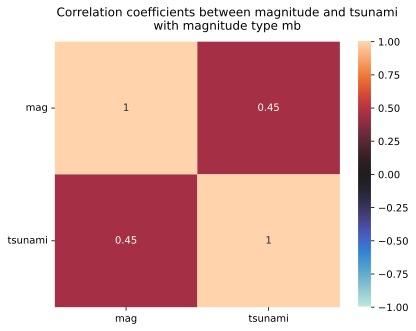

In [13]:
sns.heatmap(
    data=quakes.query("magType == 'mb'")[['mag', 'tsunami']].corr(),
    annot=True,
    center=0,
    vmin=-1,
    vmax=1,
)
plt.suptitle( 'Correlation coefficients between magnitude and tsunami\n'\
              'with magnitude type mb')

plt.yticks(rotation=0)

In [20]:
# fb.close.quantile
# fb[['close', 'volume']].quantile

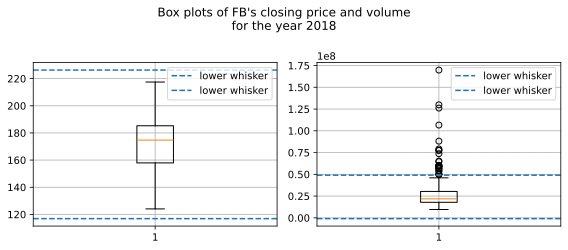

In [53]:
# 2.
cols = ['close', 'volume']

quantile = fb[['close', 'volume']].quantile([0.25, 0.75])
quantile.loc['iqr', : ] = quantile.loc[0.75, : ] - quantile.loc[0.25, : ]

fig, ax = plt.subplots(1,2, figsize=(8,3.5))

for i in range(2):
  ax[i].boxplot(data=fb, x = cols[i])
  ax[i].axhline(
      quantile.loc[0.25, cols[i]] - (1.5* quantile.loc['iqr', cols[i]]),
      label='lower whisker',
      linestyle='--'
      )
  ax[i].axhline(
      quantile.loc[0.75, cols[i]] + (1.5* quantile.loc['iqr', cols[i]]),
      label='lower whisker',
      linestyle='--'
      )
  ax[i].legend(loc='upper right')
  ax[i].grid()

plt.suptitle("Box plots of FB's closing price and volume\n"\
             "for the year 2018"
)
plt.tight_layout()

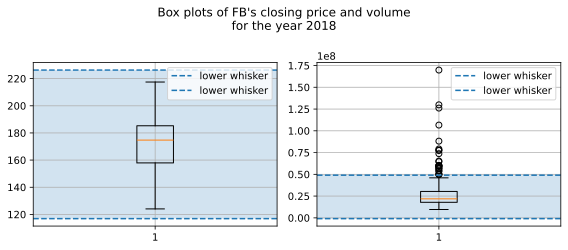

In [57]:
# 3.

cols = ['close', 'volume']

quantile = fb[['close', 'volume']].quantile([0.25, 0.75])
quantile.loc['iqr', : ] = quantile.loc[0.75, : ] - quantile.loc[0.25, : ]

fig, ax = plt.subplots(1,2, figsize=(8,3.5))

for i in range(2):
  ax[i].boxplot(data=fb, x = cols[i])
  ax[i].axhline(
      y= quantile.loc[0.25, cols[i]] - (1.5* quantile.loc['iqr', cols[i]]),
      label='lower whisker',
      linestyle='--'
      )
  ax[i].axhline(
      y= quantile.loc[0.75, cols[i]] + (1.5* quantile.loc['iqr', cols[i]]),
      label='lower whisker',
      linestyle='--'
      )
  ax[i].axhspan(
      ymin=quantile.loc[0.25, cols[i]] - (1.5* quantile.loc['iqr', cols[i]]),
      ymax=quantile.loc[0.75, cols[i]] + (1.5* quantile.loc['iqr', cols[i]]),
      alpha=0.2
  )
  ax[i].legend(loc='upper right')
  ax[i].grid()

plt.suptitle("Box plots of FB's closing price and volume\n"\
             "for the year 2018"
)
plt.tight_layout()

In [59]:
# plt.axhline
# plt.axhspan

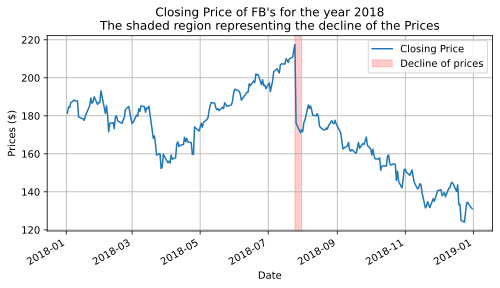

In [85]:
# 4.

ax = fb.close.plot(
    label='Closing Price',
    figsize=(8,4)
)
ax.axvspan(
    xmin='2018-07-25',
    xmax='2018-07-31',
    alpha=0.2,
    color='red',
    label='Decline of prices'
)
ax.set_title("Closing Price of FB's for the year 2018\n"\
             "The shaded region representing the decline of the Prices"
)
ax.set_ylabel('Prices ($)')
ax.set_xlabel('Date')
ax.grid()
ax.legend()

Text(0.5, 0, 'Date')

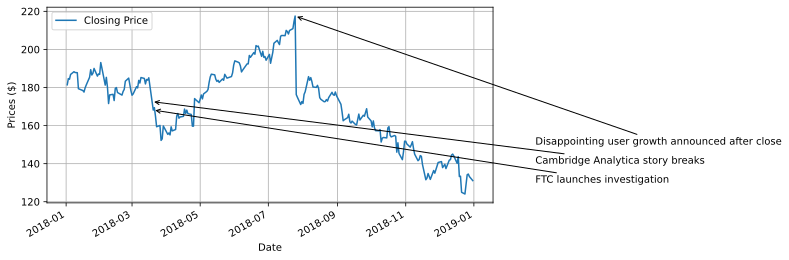

In [97]:
# 5.

ax = fb.close.plot(
    kind='line',
    label='Closing Price',
    figsize=(8,4),
    grid=True,
)

ax.annotate(
    text="Disappointing user growth announced after close",
    xy=('2018-07-25', fb.close['2018-07-25']),
    xytext=('2019-02-25', 150),
    arrowprops=dict(arrowstyle='->')
)
ax.annotate(
    text="Cambridge Analytica story breaks",
    xy=('2018-03-19', fb.close['2018-03-19']),
    xytext=('2019-02-25', 140),
    arrowprops=dict(arrowstyle='->')
)
ax.annotate(
    text="FTC launches investigation",
    xy=('2018-03-20', fb.close['2018-03-20']),
    xytext=('2019-02-25', 130),
    arrowprops=dict(arrowstyle='->')
)

ax.legend()
ax.set_ylabel('Prices ($)')
ax.set_xlabel('Date')